## Federal Funds Effective Rate 
The federal funds rate is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight.
https://fred.stlouisfed.org/series/FEDFUNDS

In [1]:
# pip install fredapi

In [18]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import yfinance as yf
import os
from fredapi import Fred  # fred.search('Treasury')

# Place your FRED API Key BELOW i.e.:  FRED_API_KEY = '12345678'
FRED_API_KEY = 'accde10bd6b603b66581c0fc6304eac2'
fred = Fred(api_key=FRED_API_KEY) 

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [19]:
apiFrom = '2000-01-01'
apiTo = '2025-07-09'

# Federal Funds Effective Rate
FEDFUND = fred.get_series('FEDFUNDS',observation_start = apiFrom, observation_end = apiTo)

# Market Yield on U.S. Treasury Securities at 2-Year Constant Maturity
T2Y = fred.get_series('DGS2',observation_start = apiFrom, observation_end = apiTo)

# Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity
T10Y = fred.get_series('DGS10',observation_start = apiFrom, observation_end = apiTo)

# SP500
SP500 = yf.download('^GSPC',start = apiFrom, end = apiTo, progress=False, auto_adjust=True).droplevel('Ticker',axis=1)['Close']

In [21]:
rate = pd.DataFrame({
    'FEDFUND':FEDFUND,
    'TBill2Y':T2Y,
    'TBill10Y':T10Y,
    'SP500':SP500,
})
rate['Announce'] = np.where(np.isnan(rate.FEDFUND),False,True)
rate['FEDFUND'] = rate['FEDFUND'].ffill()
rate['FEDFUNDPriceRel'] = rate['FEDFUND']/rate['FEDFUND'].shift(1)
rate['TBill2YPriceRel'] = rate['TBill2Y']/rate['TBill2Y'].shift(1)
rate['TBill10YPriceRel'] = rate['TBill10Y']/rate['TBill10Y'].shift(1)
rate['SP500PriceRel'] = rate['SP500']/rate['SP500'].shift(1)

In [22]:
rate[['FEDFUND','TBill2Y','TBill10Y','SP500']].corr()

,FEDFUND,TBill2Y,TBill10Y,SP500
FEDFUND,1.000000,0.957319,0.754792,0.213774
TBill2Y,0.957319,1.000000,0.840976,0.145552
TBill10Y,0.754792,0.840976,1.000000,-0.222756
SP500,0.213774,0.145552,-0.222756,1.000000


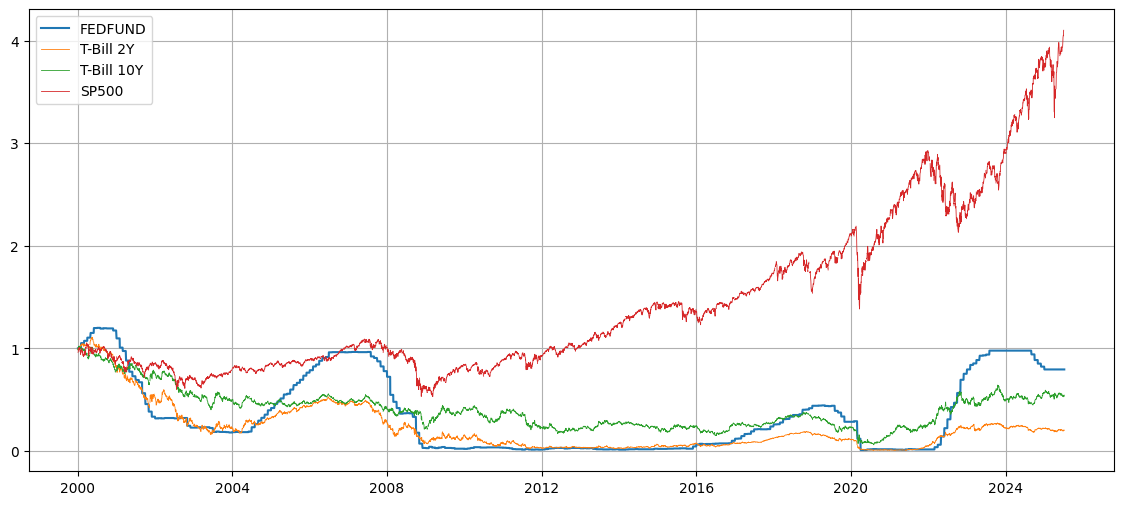

In [23]:
plt.figure(figsize=(14,6))
plt.plot(rate.index, rate.FEDFUNDPriceRel.cumprod(), label='FEDFUND')
plt.plot(rate.index, rate.TBill2YPriceRel.cumprod(), label='T-Bill 2Y', lw=0.6)
plt.plot(rate.index, rate.TBill10YPriceRel.cumprod(), label='T-Bill 10Y', lw=0.6)
plt.plot(rate.index, rate['SP500PriceRel'].cumprod(), label='SP500', lw=0.6)
plt.legend()
plt.grid(True)
plt.show()